In [7]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
#import mpl_scatter_density
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec
from scipy.stats import gaussian_kde
import skimage
import plotly.graph_objects as go

from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans

import matplotlib
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from statistics import mode
from matplotlib import transforms
import netCDF4

import os
import moviepy.video.io.ImageSequenceClip
from IPython.display import Video

import dash_bio
import seaborn

In [8]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [9]:
m3_k50 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/All_KL_Clustering/Clustering_KL_Analysis/Compressed_Data/K_50_M3_Clustered_By_M3.npy")
m2_elbo = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Compressed_Data/True_M2_ELBO_Clustered_By_M3.npy")

# Paper Figure

In [10]:
#from scipy import stats
#pearson_r, pearson_p = stats.pearsonr(m3_k50.ravel(), m2_elbo.ravel())
#print("The Zonal R2 is:",pearson_r**2)

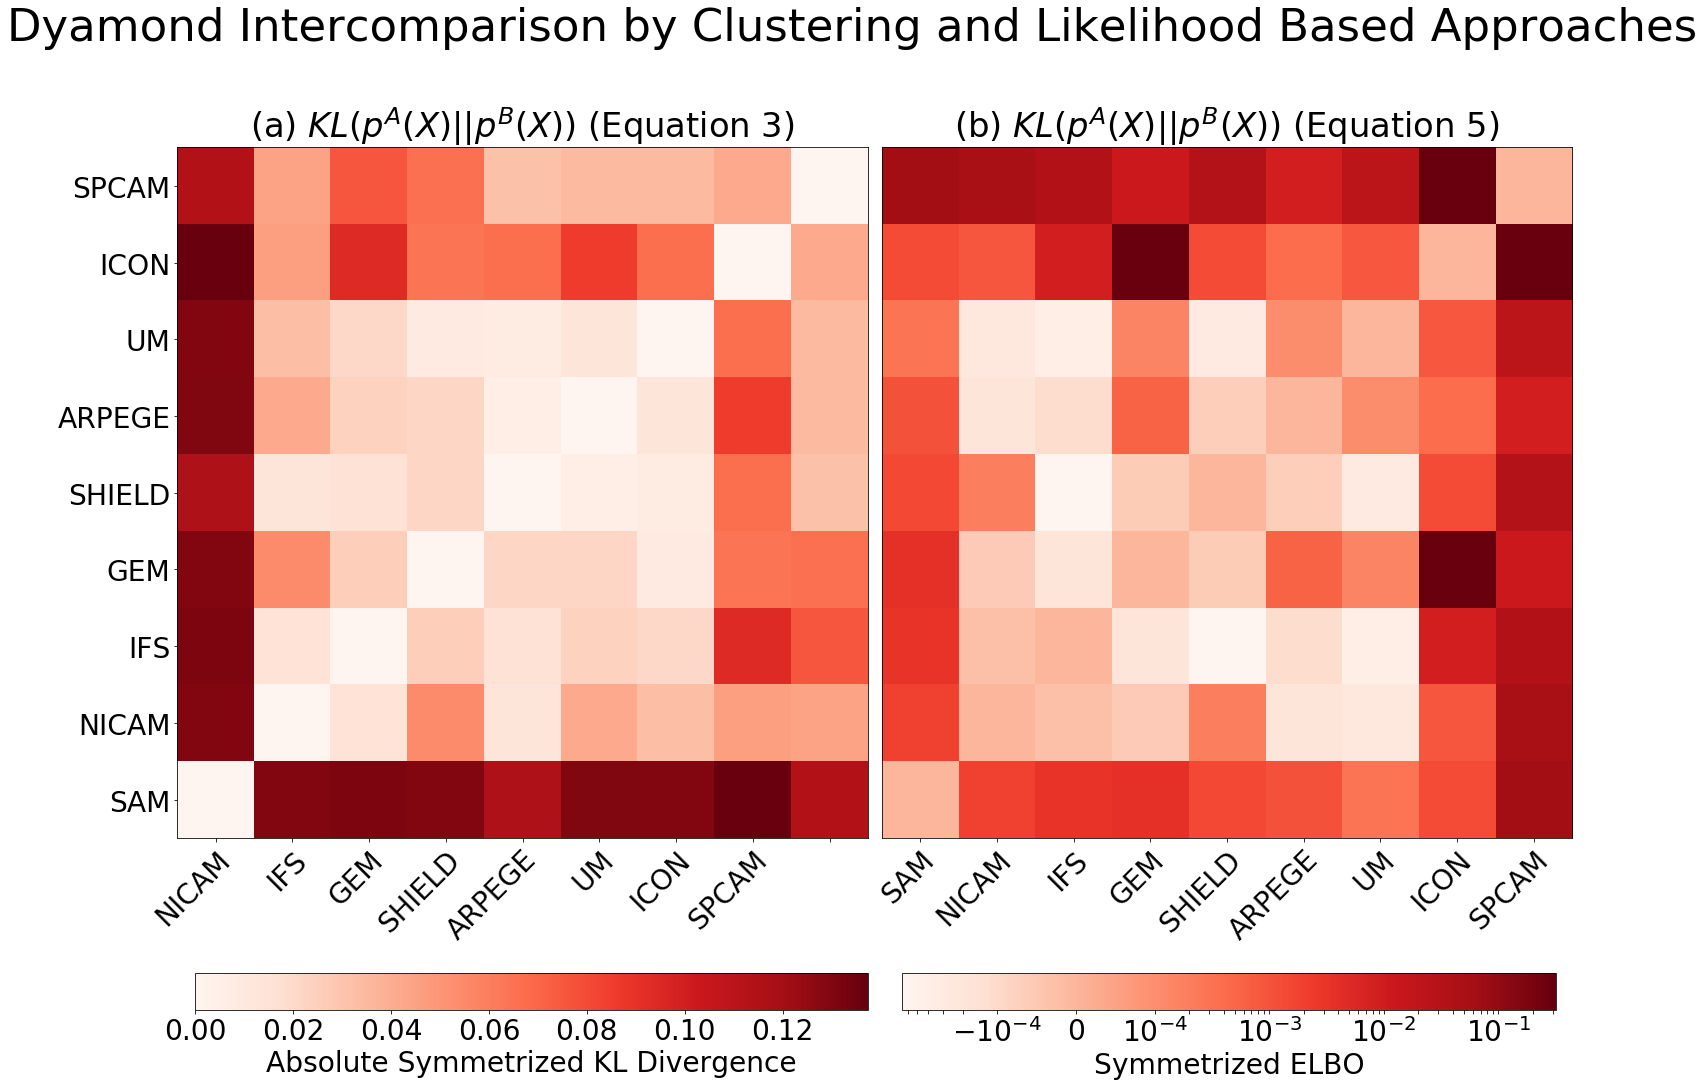

In [11]:
fig, ax = plt.subplots(1,2,figsize=(25,17))
models = ["SAM","NICAM","IFS","GEM","SHIELD","ARPEGE","UM","ICON","SPCAM"]
models_y = ["SPCAM","ICON", "UM", "ARPEGE", "SHIELD", "GEM", "IFS", "NICAM", "SAM"]


im = ax[0].imshow(m3_k50, cmap="Reds")

p0 = ax[0].get_position().get_points().flatten()
p2 = ax[0].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]+0.01, 0.08, p0[1]+0.13, 0.03])
cbar = fig.colorbar(im, cax=ax_cbar, orientation='horizontal')
cbar.set_label('Absolute Symmetrized KL Divergence', fontsize=fz*1.25)
cbar.ax.tick_params(labelsize=fz*1.25) 

#ax[0].set_ylabel("Data Type")
ax[0].set_title(r"(a) $KL(p^A(X)||p^B(X))$ (Equation 3)", fontsize=fz*1.5)
ax[0].set_yticks(np.arange(len(models)))
ax[0].set_yticklabels(models_y, fontsize=fz*1.25)
ax[0].set_xticklabels(models, fontsize=fz*1.25)

im = ax[1].imshow(m2_elbo, cmap="Reds", norm=matplotlib.colors.SymLogNorm(linthresh=(0.0001)))

p0 = ax[1].get_position().get_points().flatten()
p2 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0]-0.02, 0.08, p0[1]+0.12, 0.03])
cbar = fig.colorbar(im, cax=ax_cbar, orientation='horizontal')
cbar.set_label('Symmetrized ELBO', fontsize=fz*1.25)
cbar.ax.tick_params(labelsize=fz*1.25)  

ax[1].set_title(r"(b) $KL(p^A(X)||p^B(X))$ (Equation 5)", fontsize=fz*1.5)
ax[1].set_xticks(np.arange(len(models)))
ax[1].set_yticks([])
ax[1].set_xticklabels(models, fontsize=fz*1.25)
ax[1].set_yticklabels(models_y)

plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.subplots_adjust(wspace=0.02)
plt.suptitle("Dyamond Intercomparison by Clustering and Likelihood Based Approaches", fontsize=fz*2, y=0.9)
#plt.savefig("../Figures/Figure_3.png", bbox_inches='tight',pad_inches = 0)
#plt.savefig("../Figures/Figure_3.pdf", bbox_inches='tight',pad_inches = 0)
print(" ")

In [12]:
#ICON Trained VAE
elbo_um_1 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/ICON/UM_Interp_For_ICON_ELBO_4400.npy")/(30.*128.*1024)

#IFS Trained VAE
elbo_um_2 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/IFS/UM_Interp_For_IFS_ELBO_4301.npy")/(30.*128.*1024)

#SPCAM Trained VAE
elbo_um_3 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/SPCAM/UM_Interp_For_SPCAM_ELBO_3100.npy")/(30.*128.*1024)

# SHIELD Trained VAE
elbo_um_4 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/SHIELD/UM_Interp_For_SHIELD_ELBO_4601.npy")/(30.*128.*1024)

# SAM Trained VAE
elbo_um_5 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/SAM/UM_Interp_For_SAM_ELBO_4100.npy")/(30.*128.*1024)

# ARPEGE Trained VAE
elbo_um_6 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/ARPEGE/UM_Interp_For_ARPEGE_ELBO_4802.npy")/(30.*128.*1024)

# UM Trained VAE
elbo_icon_7 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/UM/ICON_Interp_For_UM_ELBO_4503.npy")/(30.*128.*1024)
elbo_ifs_7 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/UM/IFS_Interp_For_UM_ELBO_4503.npy")/(30.*128.*1024)
elbo_spcam_7 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/UM/SPCAM_Interp_For_UM_ELBO_4503.npy")/(30.*128.*1024)
elbo_shield_7 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/UM/SHIELD_Interp_For_UM_ELBO_4503.npy")/(30.*128.*1024)
elbo_sam_7 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/UM/SAM_Interp_For_UM_ELBO_4503.npy")/(30.*128.*1024)
elbo_arpege_7 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/UM/ARPEGE_Interp_For_UM_ELBO_4503.npy")/(30.*128.*1024)
elbo_um_7 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/UM/UM_ELBO_4503.npy")/(30.*128.*1024)
elbo_nicam_7 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/UM/NICAM_Interp_For_UM_ELBO_4503.npy")/(30.*128.*1024)
elbo_gem_7 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/UM/GEM_Interp_For_UM_ELBO_4503.npy")/(30.*128.*1024)

# NICAM Trained VAE
elbo_um_8 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/NICAM/UM_Interp_For_NICAM_ELBO_4213.npy")/(30.*128.*1024)

# GEM Trained VAE
elbo_um_9 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/model_graphs/Anomalies/Matrix/GEM/UM_Interp_For_GEM_ELBO_4703.npy")/(30.*128.*1024)


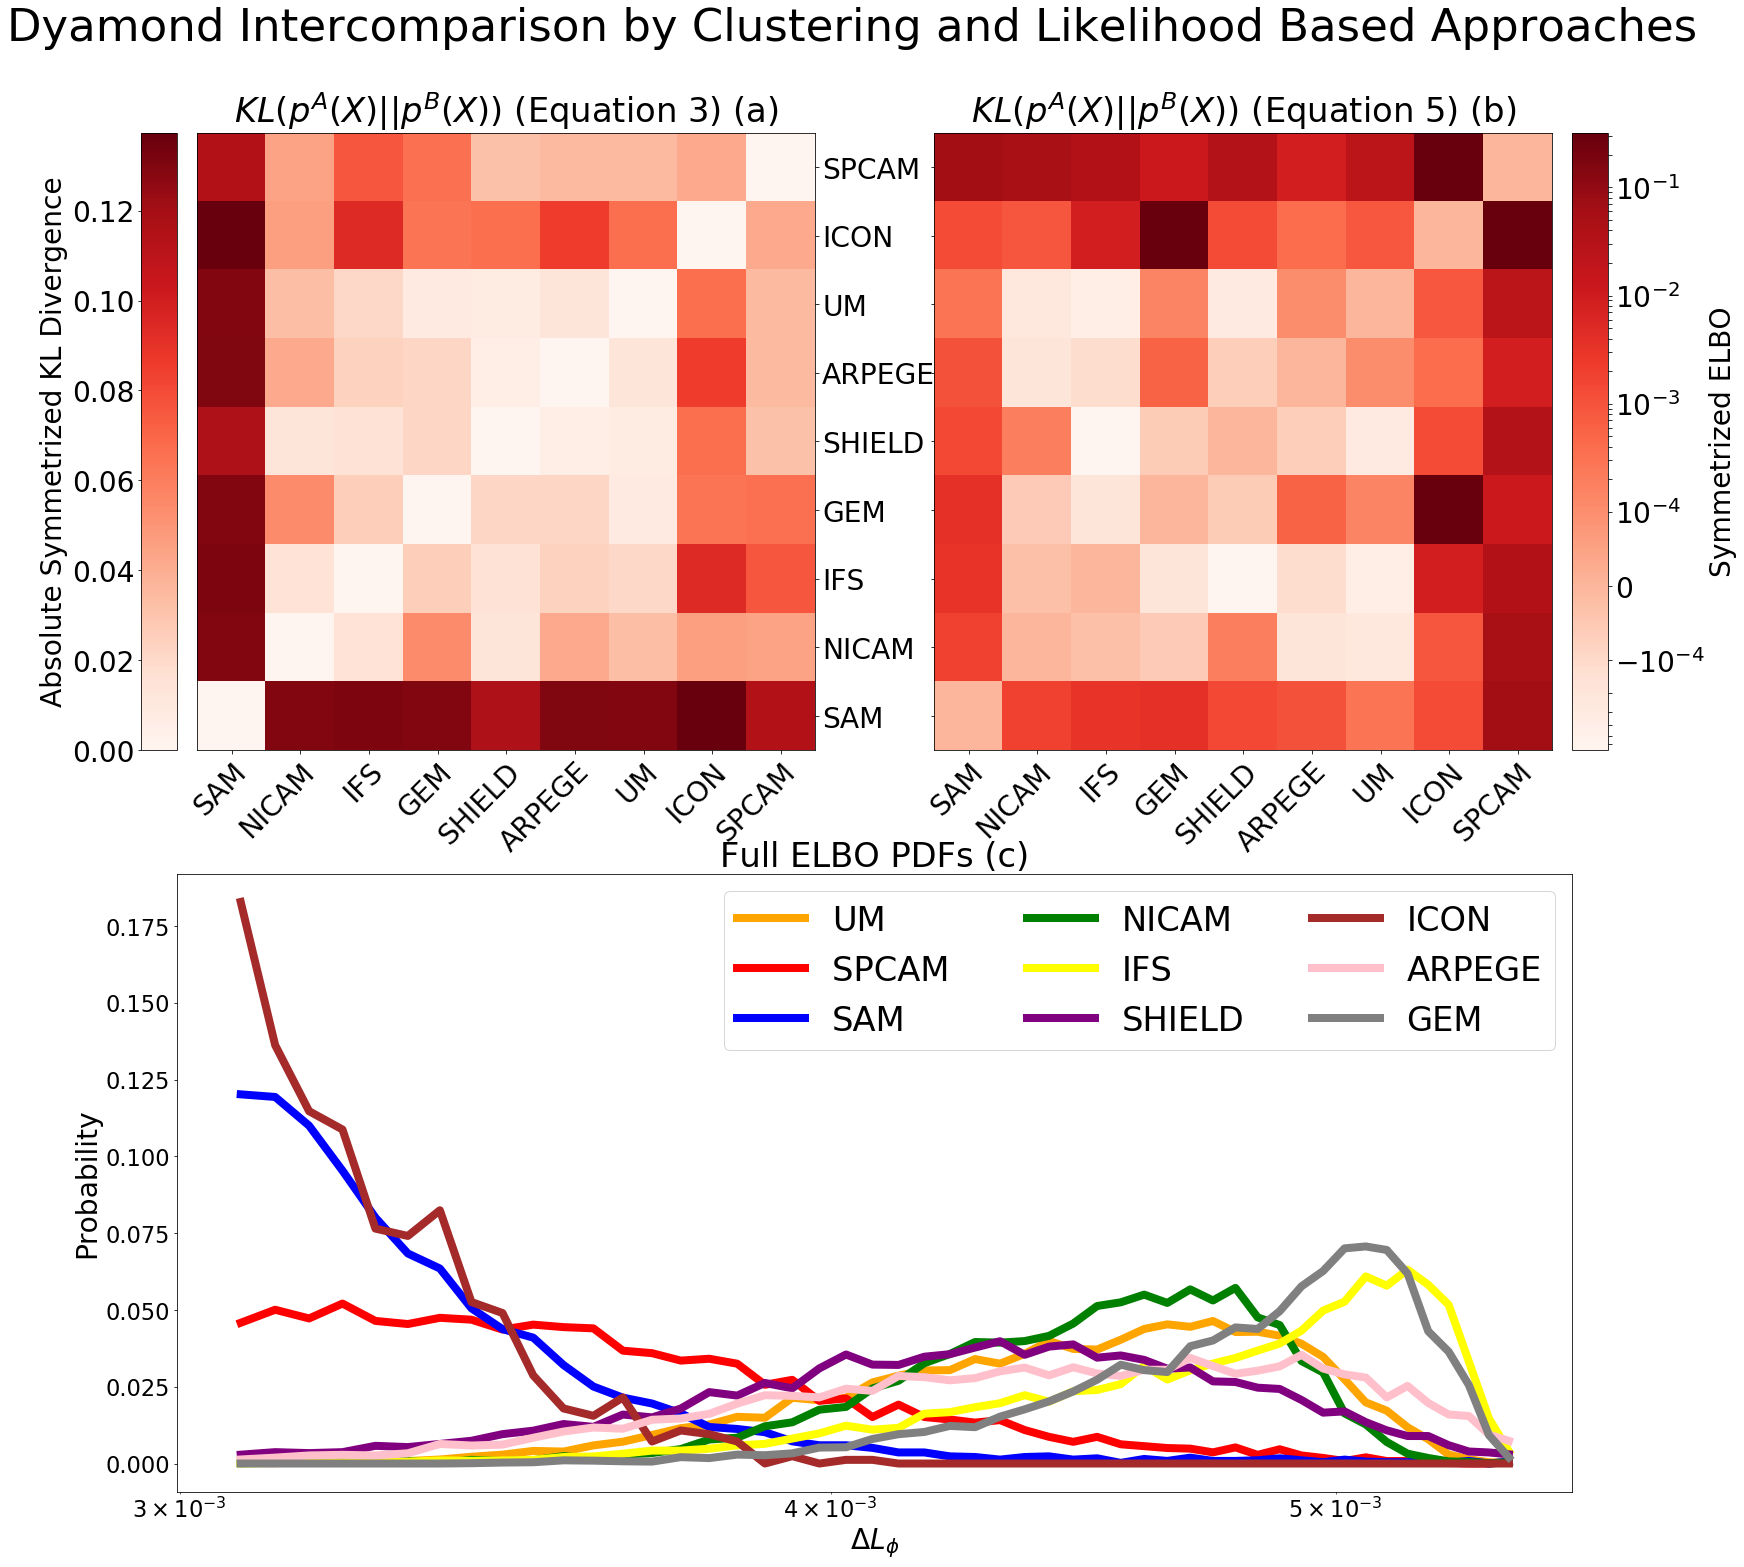

In [56]:
fig, ax = plt.subplots(2,2,figsize=(25,25))
gs=GridSpec(2,2)

models = ["SAM","NICAM","IFS","GEM","SHIELD","ARPEGE","UM","ICON","SPCAM"]
models_y = ["SPCAM","ICON", "UM", "ARPEGE", "SHIELD", "GEM", "IFS", "NICAM", "SAM"]

ax1=fig.add_subplot(gs[0,0])

im = ax1.imshow(m3_k50, cmap="Reds")

ax_cbar = fig.add_axes([0.105, 0.537, 0.02, 0.343])
cbar = fig.colorbar(im, cax=ax_cbar)
cbar.set_label('Absolute Symmetrized KL Divergence', fontsize=fz*1.25)
cbar.ax.tick_params(labelsize=fz*1.25) 

cbar.ax.yaxis.set_ticks_position('left')
cbar.ax.yaxis.set_label_position('left')

ax1.set_title(r"$KL(p^A(X)||p^B(X))$ (Equation 3) (a)", fontsize=fz*1.5)
ax1.set_yticks(np.arange(len(models)))
ax1.set_xticks(np.arange(len(models)))
ax1.set_xticklabels(models, fontsize=fz*1.25)
ax1.set_yticklabels(models_y, fontsize=fz*1.25)
ax1.yaxis.tick_right()

ax2=fig.add_subplot(gs[0,1])

im = ax2.imshow(m2_elbo, cmap="Reds", norm=matplotlib.colors.SymLogNorm(linthresh=(0.0001)))

ax_cbar = fig.add_axes([0.90, 0.537, 0.02, 0.343])
cbar = fig.colorbar(im, cax=ax_cbar)
cbar.set_label('Symmetrized ELBO', fontsize=fz*1.25)
cbar.ax.tick_params(labelsize=fz*1.25)  

ax2.set_title(r"$KL(p^A(X)||p^B(X))$ (Equation 5) (b)", fontsize=fz*1.5)
ax2.set_xticks(np.arange(len(models)))
ax2.set_xticklabels(models, fontsize=fz*1.25)
ax2.set_yticklabels([])

plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax3=fig.add_subplot(gs[1,:])

shared_bins = np.histogram_bin_edges(elbo_um_7, bins=50)
um_freq, um_edges = np.histogram(elbo_um_7, bins = shared_bins, density=True)
icon_freq, icon_edges = np.histogram(elbo_icon_7, bins = shared_bins, density=True)
ifs_freq, ifs_edges = np.histogram(elbo_ifs_7, bins = shared_bins, density=True)
spcam_freq, spcam_edges = np.histogram(elbo_spcam_7, bins = shared_bins, density=True)
shield_freq, shield_edges = np.histogram(elbo_shield_7, bins = shared_bins, density=True)
sam_freq, sam_edges = np.histogram(elbo_sam_7, bins = shared_bins, density=True)
arpege_freq, arpege_edges = np.histogram(elbo_arpege_7, bins = shared_bins, density=True)
nicam_freq, nicam_edges = np.histogram(elbo_nicam_7, bins = shared_bins, density=True)
gem_freq, gem_edges = np.histogram(elbo_gem_7, bins = shared_bins, density=True)

ax3.plot(um_edges[:-1], um_freq/np.sum(um_freq),  label = "UM", color = 'orange', linewidth=8)
ax3.plot(spcam_edges[:-1], spcam_freq/np.sum(spcam_freq), label = "SPCAM ", color = 'red', linewidth=8)
ax3.plot(sam_edges[:-1], sam_freq/np.sum(sam_freq), label = "SAM", color = 'blue', linewidth=8)
ax3.plot(nicam_edges[:-1], nicam_freq/np.sum(nicam_freq), label = "NICAM", color = 'green', linewidth=8)
ax3.plot(ifs_edges[:-1], ifs_freq/np.sum(ifs_freq), label = "IFS", color = 'yellow', linewidth=8)
ax3.plot(shield_edges[:-1], shield_freq/np.sum(shield_freq), label = "SHIELD", color = 'purple', linewidth=8)
ax3.plot(icon_edges[:-1], icon_freq/np.sum(icon_freq), label = "ICON", color = 'brown', linewidth=8)
ax3.plot(arpege_edges[:-1], arpege_freq/np.sum(arpege_freq), label = "ARPEGE", color = 'pink', linewidth=8)
ax3.plot(gem_edges[:-1], gem_freq/np.sum(gem_freq), label = "GEM", color = 'grey', linewidth=8)

ax3.legend(fontsize=fz*1.5, ncol=3)
ax3.set_xlabel(r"$\Delta {\mathit{L}}_\phi$", fontsize = fz*1.25)
ax3.set_ylabel('Probability', fontsize = fz*1.25)
ax3.set_title('Full ELBO PDFs (c)', fontsize = 1.5*fz)

ax3.set_xscale("log")
ax3.tick_params(axis='both', which='both', labelsize=fz)

fig.delaxes(ax[0,0])
fig.delaxes(ax[0,1])
fig.delaxes(ax[1,1])
fig.delaxes(ax[1,0])

plt.subplots_adjust(wspace=0.12)
plt.suptitle("Dyamond Intercomparison by Clustering and Likelihood Based Approaches", fontsize=fz*2, y=0.95)
plt.savefig("../Figures/Figure_3.png", bbox_inches='tight',pad_inches = 0)
plt.savefig("../Figures/Figure_3.pdf", bbox_inches='tight',pad_inches = 0)
print(" ")